# EfficientNet Implementation   - EfficientNet- B0

## Training a Custom  Model from scratch 

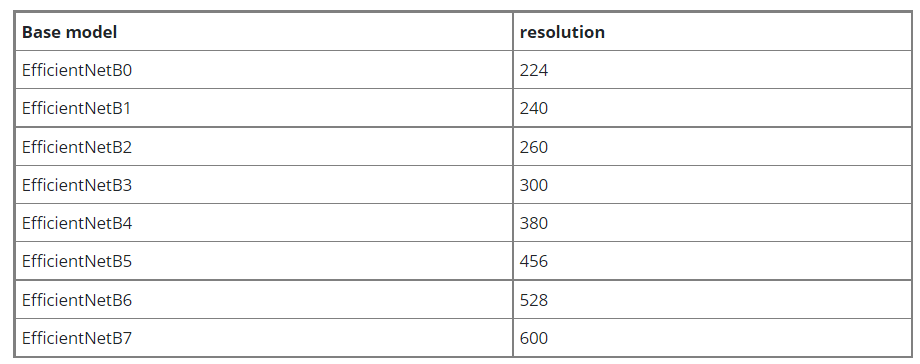

# Data Pre Processing

In [1]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('dataset')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['Axe', 'Chik', 'clear']
Types of classes labels found:  3


In [2]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('dataset' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [3]:

# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

  Labels                       image
0    Axe  dataset_path/Axe/12_21.jpg
1    Axe  dataset_path/Axe/12_22.jpg
2    Axe  dataset_path/Axe/12_23.jpg
3    Axe  dataset_path/Axe/12_24.jpg
4    Axe  dataset_path/Axe/12_25.jpg
    Labels                                  image
607  clear  dataset_path/clear/85_t15_59.jpg1.png
608  clear            dataset_path/clear/8_80.jpg
609  clear            dataset_path/clear/8_82.jpg
610  clear            dataset_path/clear/9_71.jpg
611  clear            dataset_path/clear/9_74.jpg


In [4]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  612
Axe      210
clear    201
Chik     201
Name: Labels, dtype: int64


In [5]:
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [6]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(612, 224, 224, 3)

In [7]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe'
 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe'
 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe'
 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe'
 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe'
 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe'
 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe'
 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe'
 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe'
 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe'
 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe'
 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe'
 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe'
 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'Axe' 'A

In [8]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(581, 224, 224, 3)
(581, 3)
(31, 224, 224, 3)
(31, 3)



# EfficientNet Implementation :



In [10]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [11]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 3)                4053414   
                                                                 
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/30
19/19 - 91s - loss: 3.1934 - accuracy: 0.5250 - 91s/epoch - 5s/step
Epoch 2/30
19/19 - 83s - loss: 2.3006 - accuracy: 0.5783 - 83s/epoch - 4s/step
Epoch 3/30
19/19 - 83s - loss: 1.4412 - accuracy: 0.6472 - 83s/epoch - 4s/step
Epoch 4/30
19/19 - 87s - loss: 1.0211 - accuracy: 0.7401 - 87s/epoch - 5s/step
Epoch 5/30
19/19 - 109s - loss: 1.0832 - accuracy: 0.7522 - 109s/epoch - 6s/step
Epoch 6/30
19/19 - 109s - loss: 1.0446 - accu

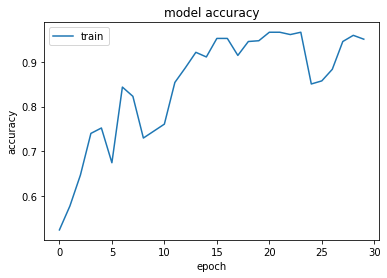

In [12]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [13]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 2s 2s/step - loss: 2.6703 - accuracy: 0.4194
Loss = 2.670315980911255
Test Accuracy = 0.4193548262119293


# Testing Efficient Model On Unseen data

Input image shape: (1, 224, 224, 3)


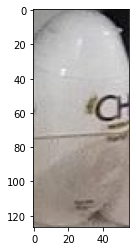

In [16]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = 'val_img1.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [17]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

array([[0., 0., 1.]], dtype=float32)